In [2]:
# Import libraries
library(ggplot2)
library(dplyr)
library(ggdist)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Load data
allConditions <- read.csv("data/allConditions.csv", header=T)
stimuli <- read.csv("data/stimuli.csv", header=T)

allConditions$source <- "All Conditions"
stimuli$source <- "Pilot Sample"
combinedDF <- bind_rows(allConditions, stimuli)

alignmentLevels <- c("aligned", "near-aligned", "far-from-aligned")
anchorLevels <- c("anchor", "near-anchor", "far-anchor")
alignmentTypes <- c("0", "25", "50", "75", "100", 
                    "0 and 25", "0 and 50", "25 and 50", 
                    "25 and 75", "50 and 75", "50 and 100", "75 and 100")

combinedDF$alignmentCategory <- factor(combinedDF$alignmentCategory, levels = alignmentLevels)
combinedDF$anchorCategory <- factor(combinedDF$anchorCategory, levels = anchorLevels)
combinedDF$alignmentType <- factor(combinedDF$alignmentType, levels = alignmentTypes)

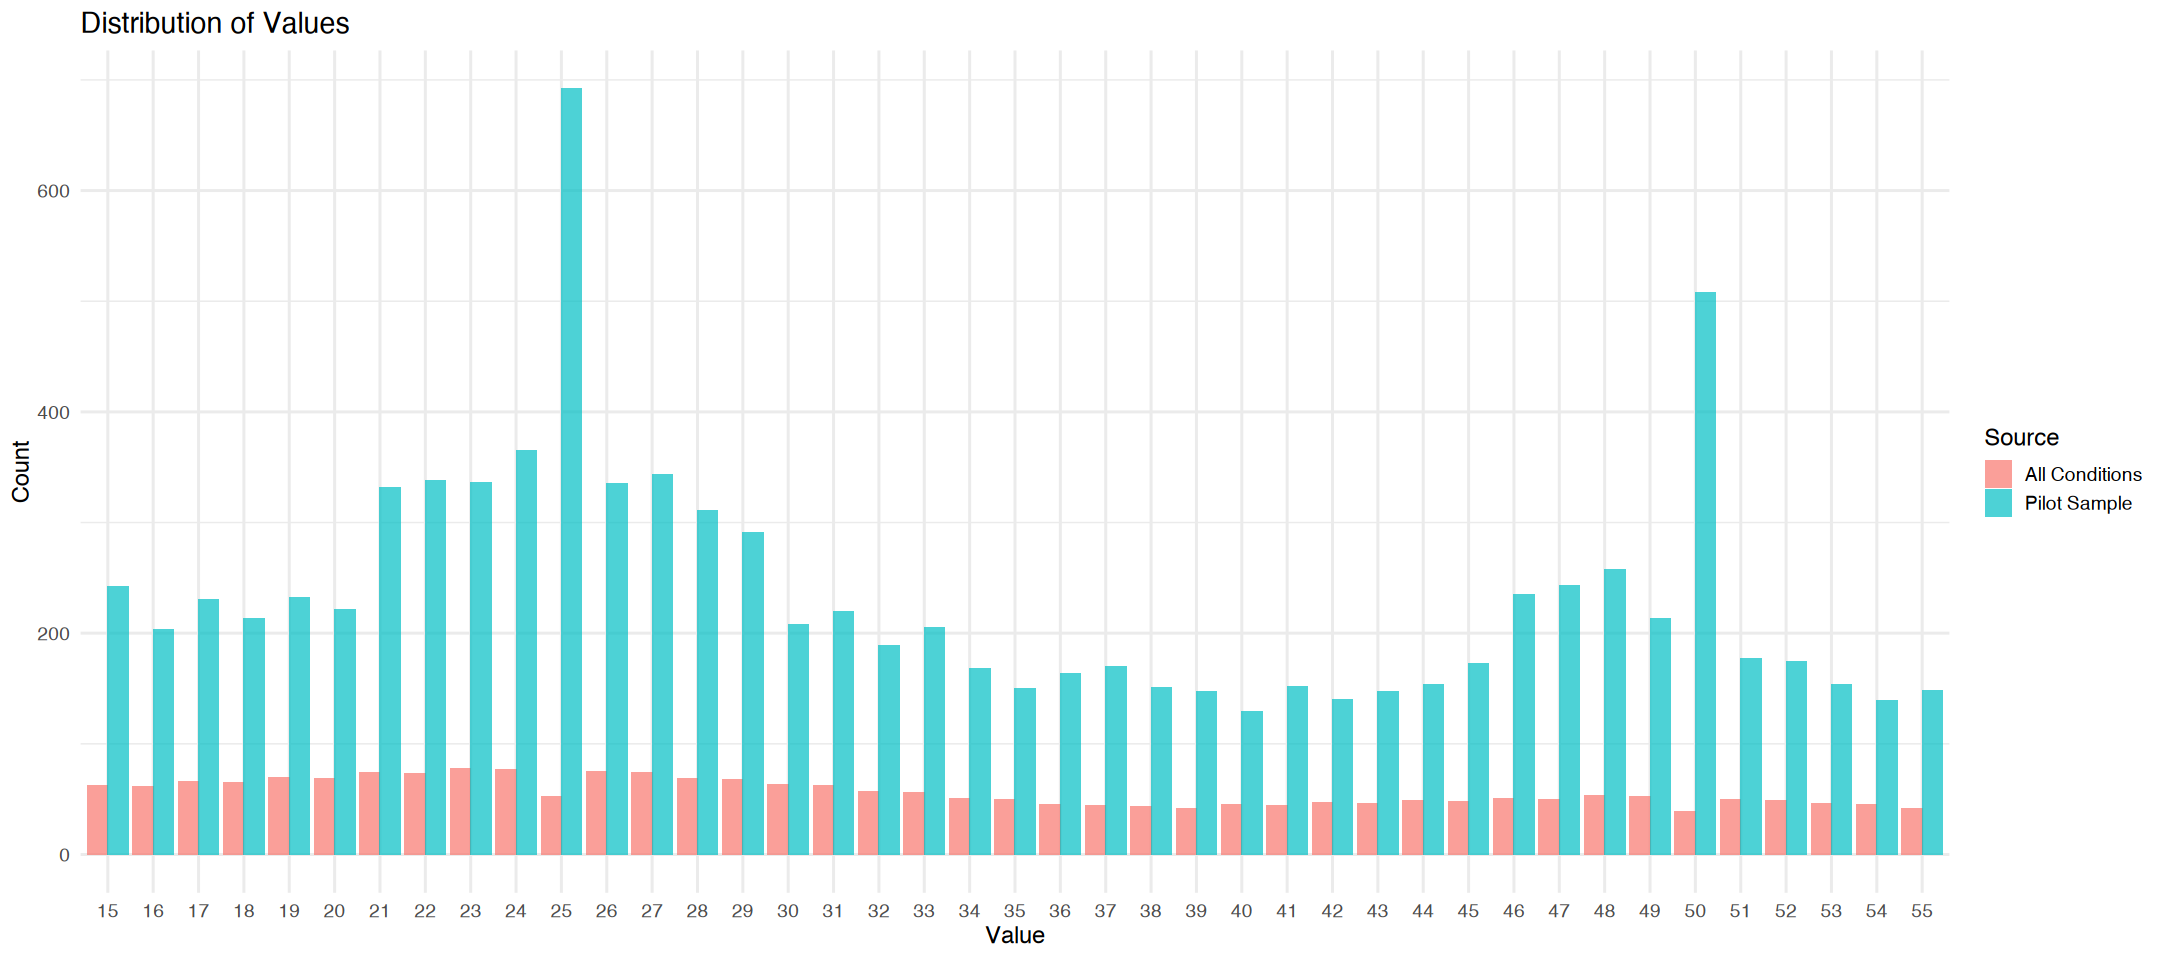

In [4]:
options(repr.plot.width = 18, repr.plot.height = 8)

# Plot the value distribution by source
values <- ggplot(combinedDF, aes(x = factor(selectedPart), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Values",
    x = "Value",
    y = "Count",
    fill = "Source"
  )

values

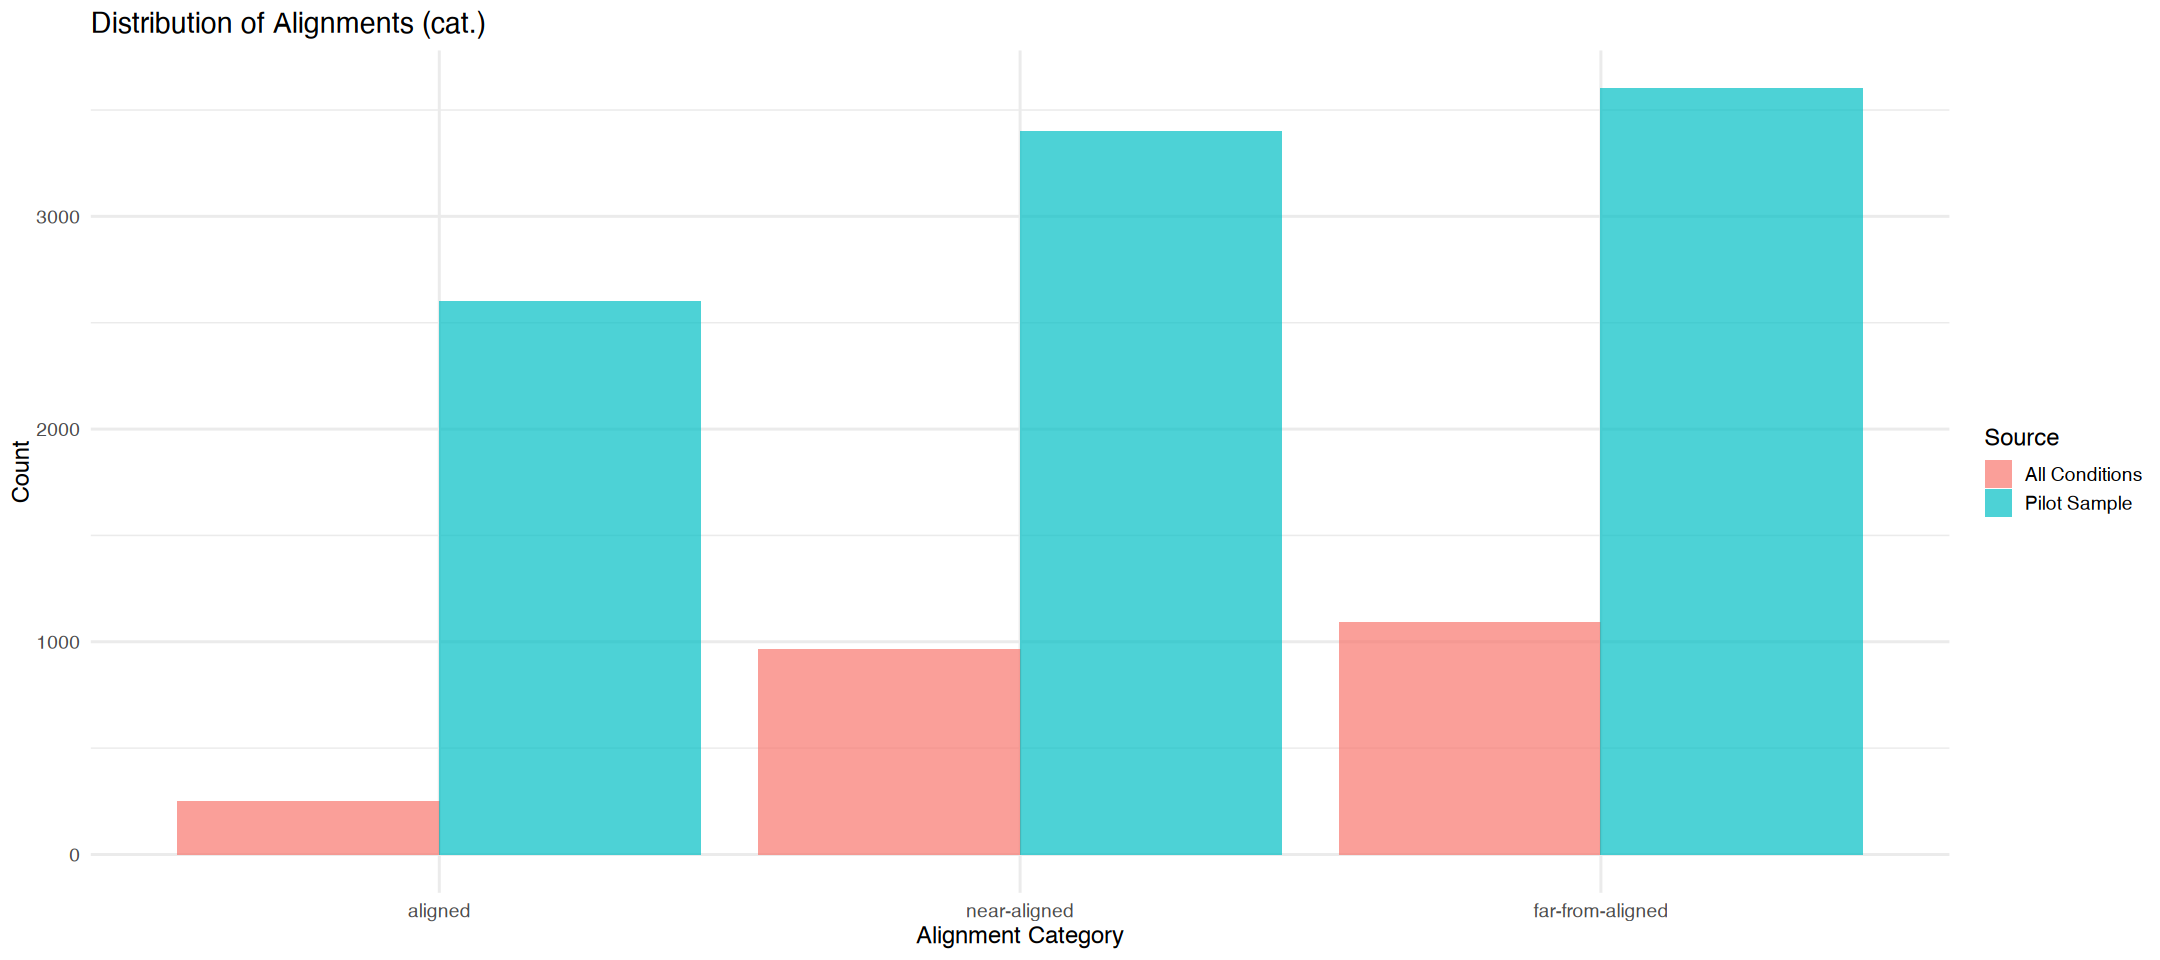

In [5]:
# Plot the value distribution by source
alignmentCategory <- ggplot(combinedDF, aes(x = factor(alignmentCategory), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Alignments (cat.)",
    x = "Alignment Category",
    y = "Count",
    fill = "Source"
  )

alignmentCategory

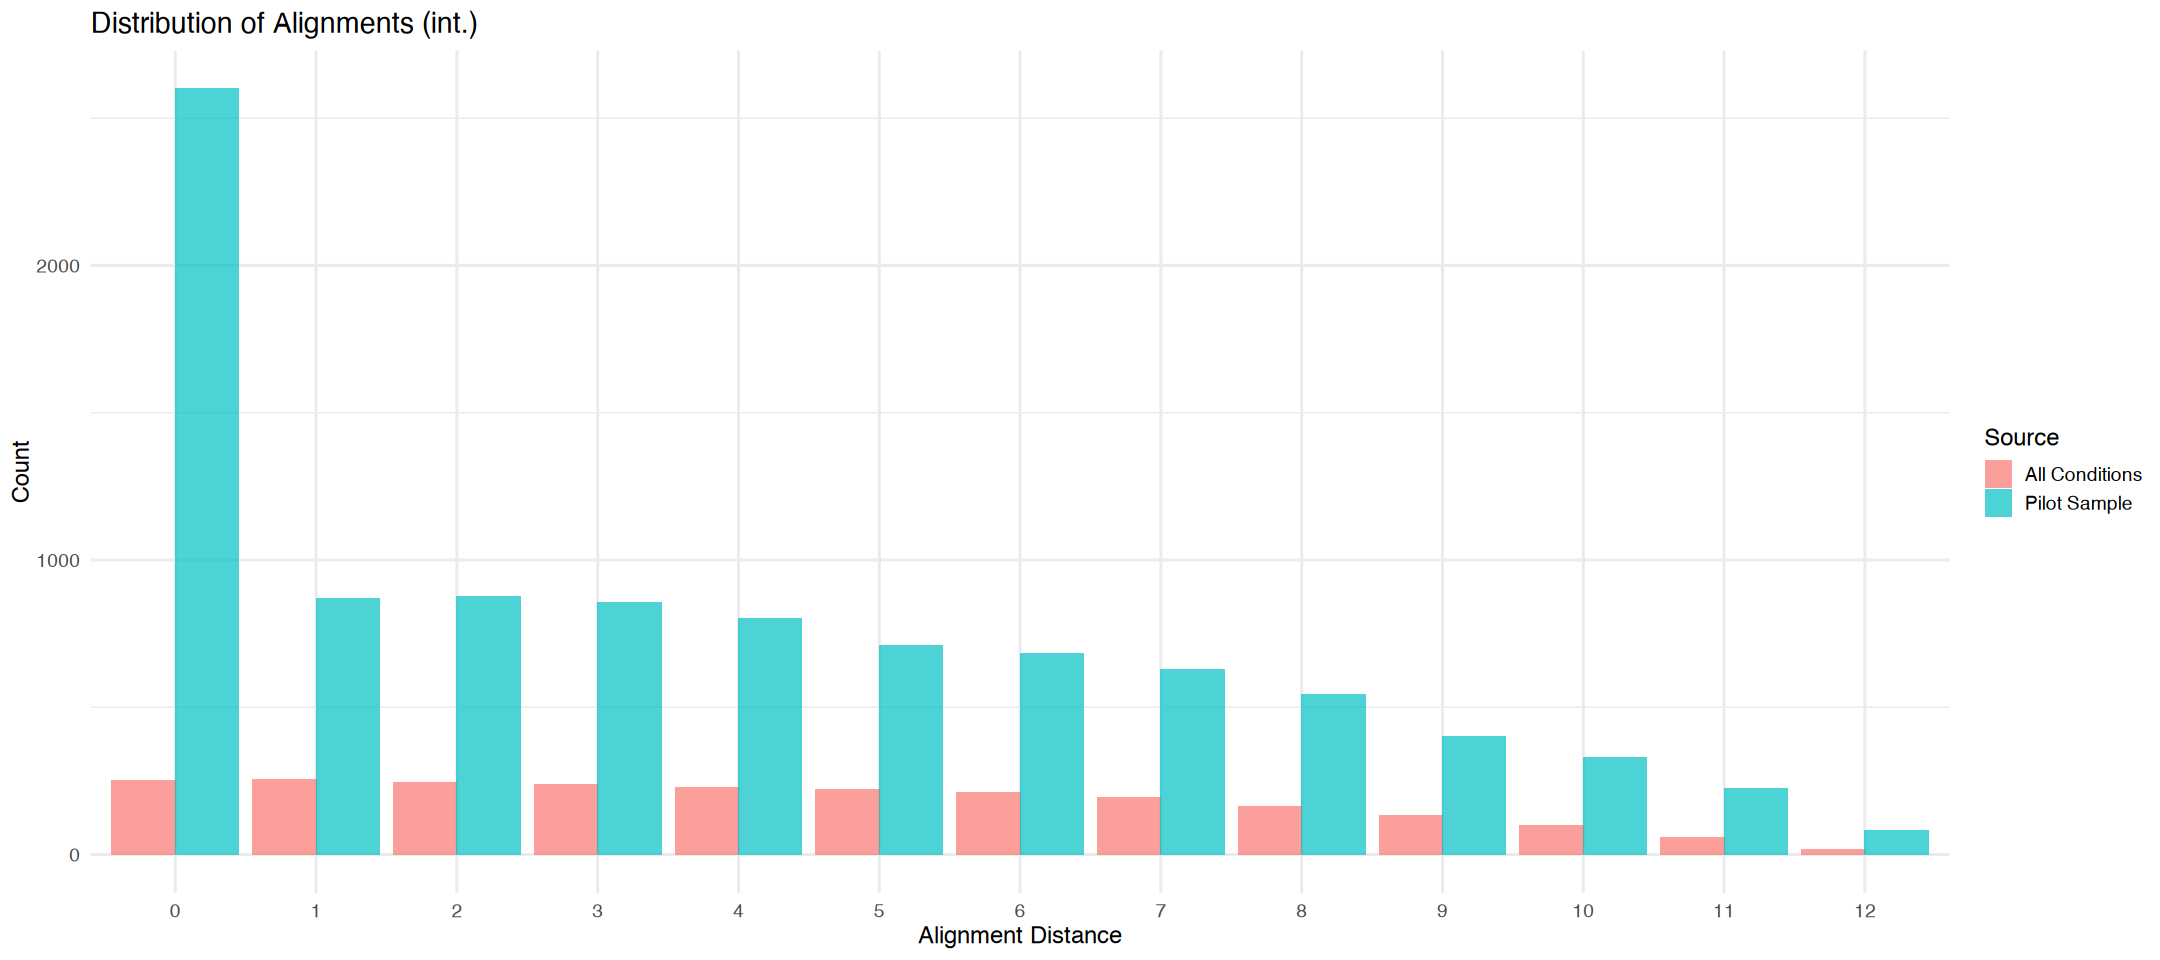

In [6]:
# Plot the value distribution by source
alignmentDistance <- ggplot(combinedDF, aes(x = factor(alignmentDistance), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  labs(
    title = "Distribution of Alignments (int.)",
    x = "Alignment Distance",
    y = "Count",
    fill = "Source"
  ) + 
  theme_minimal(base_size = 14)

alignmentDistance

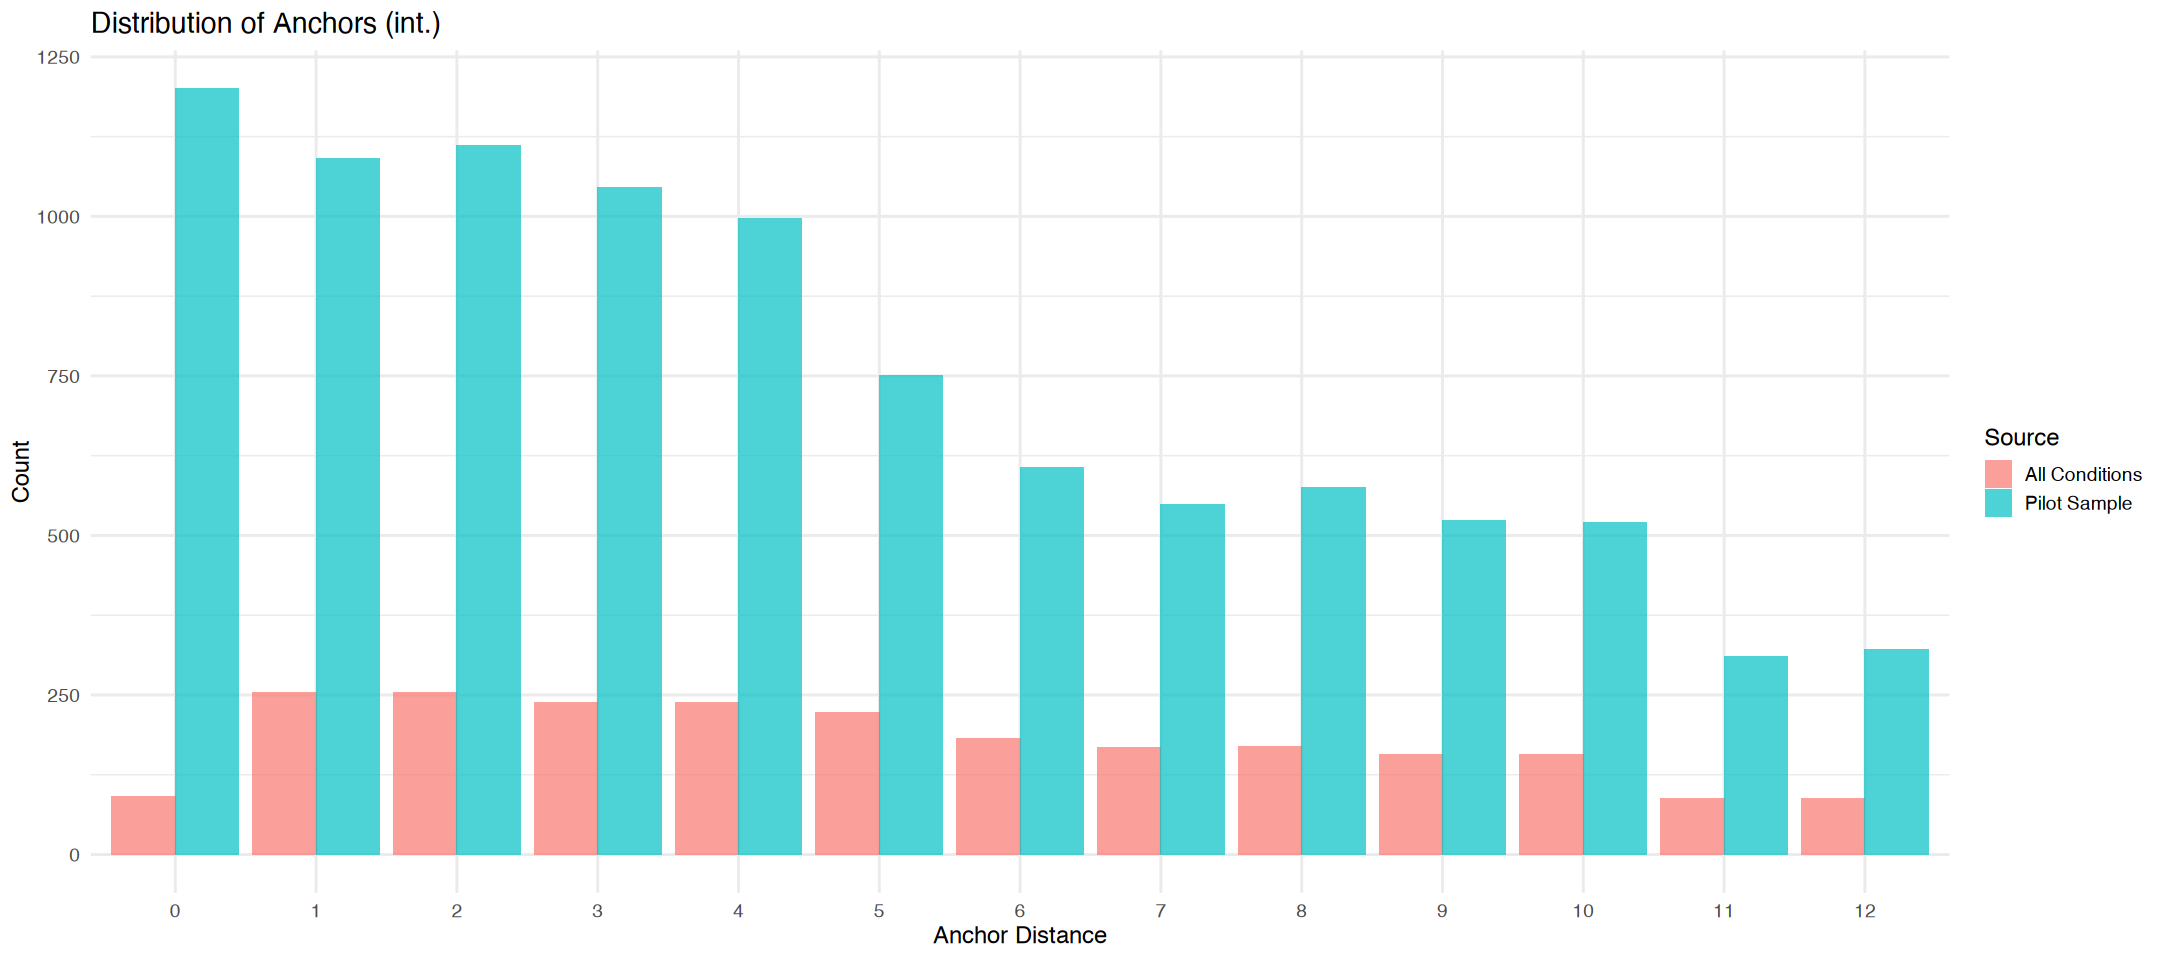

In [7]:
# Plot the value distribution by source
anchorDistance <- ggplot(combinedDF, aes(x = factor(anchorDistance), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Anchors (int.)",
    x = "Anchor Distance",
    y = "Count",
    fill = "Source"
  )

anchorDistance

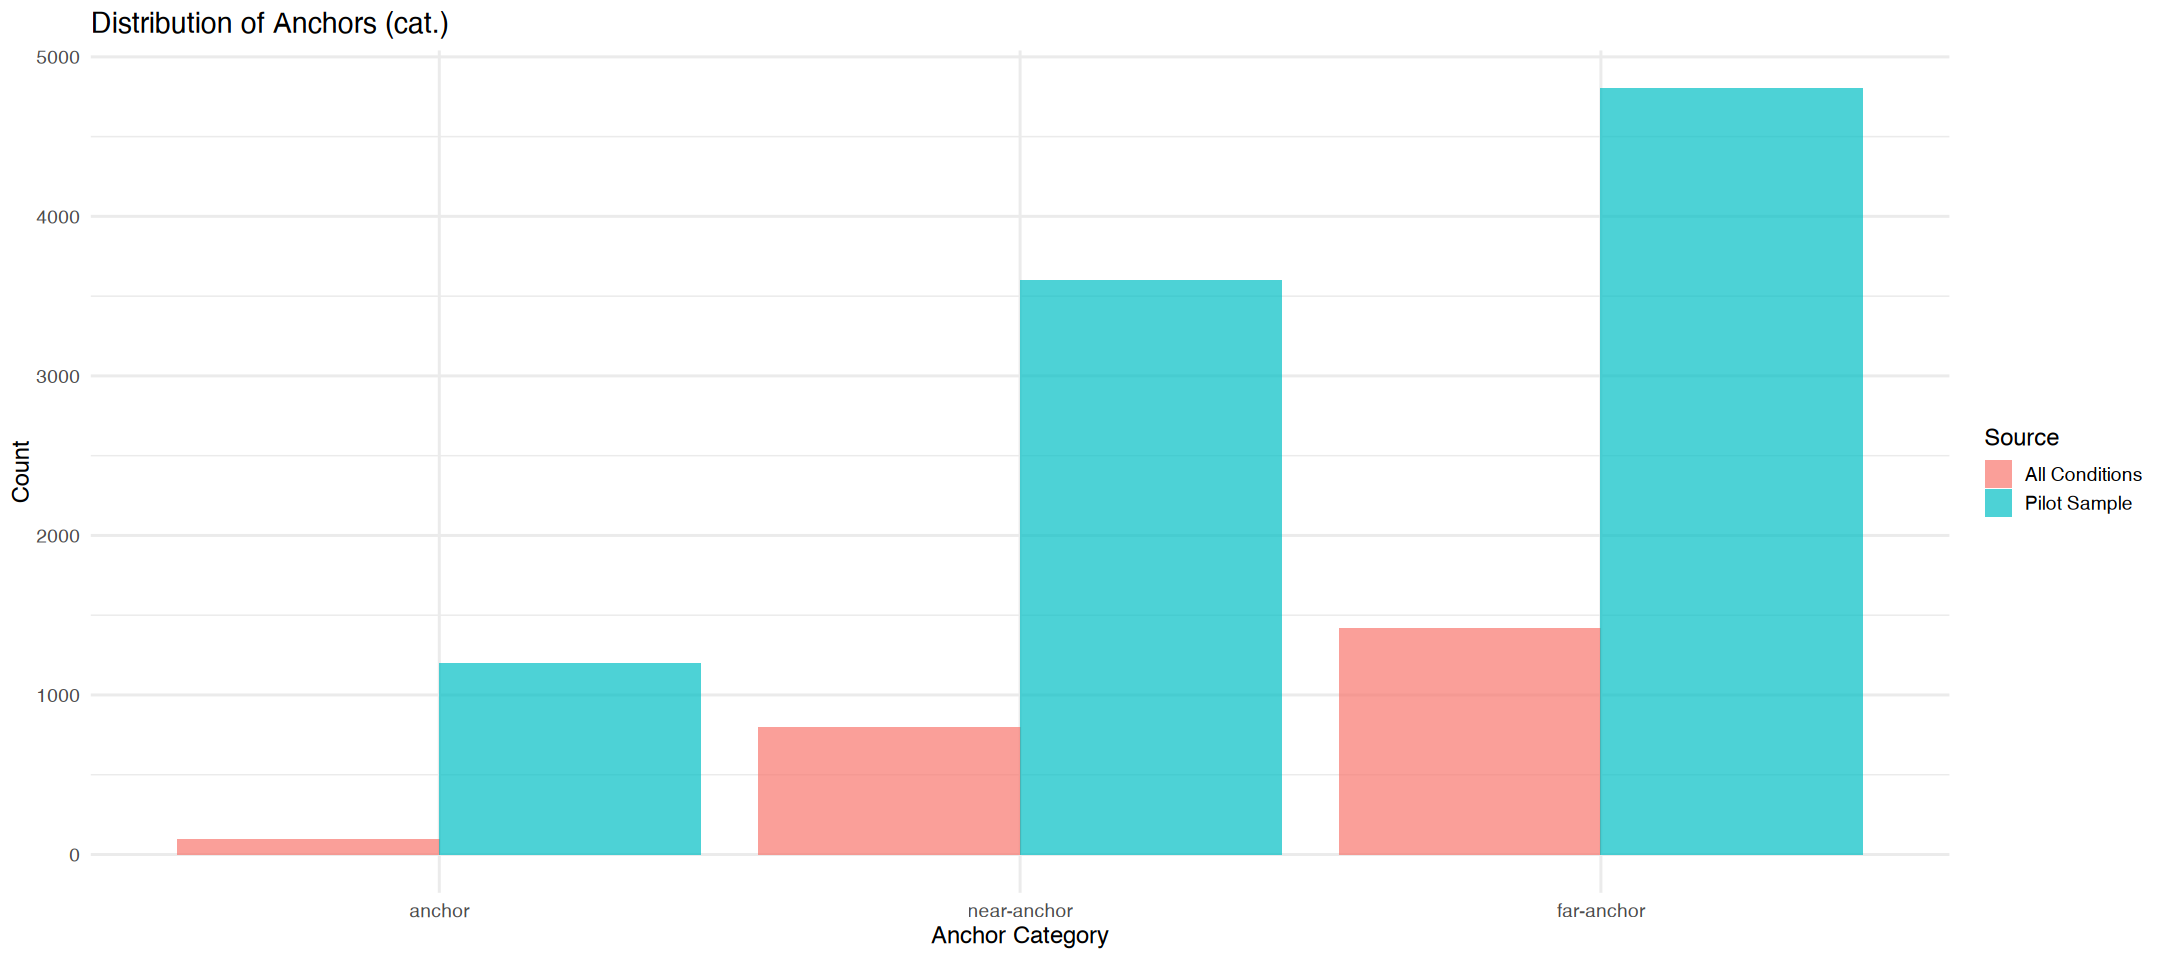

In [8]:
# Plot the value distribution by source
anchorCategory <- ggplot(combinedDF, aes(x = factor(anchorCategory), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Anchors (cat.)",
    x = "Anchor Category",
    y = "Count",
    fill = "Source"
  )

anchorCategory

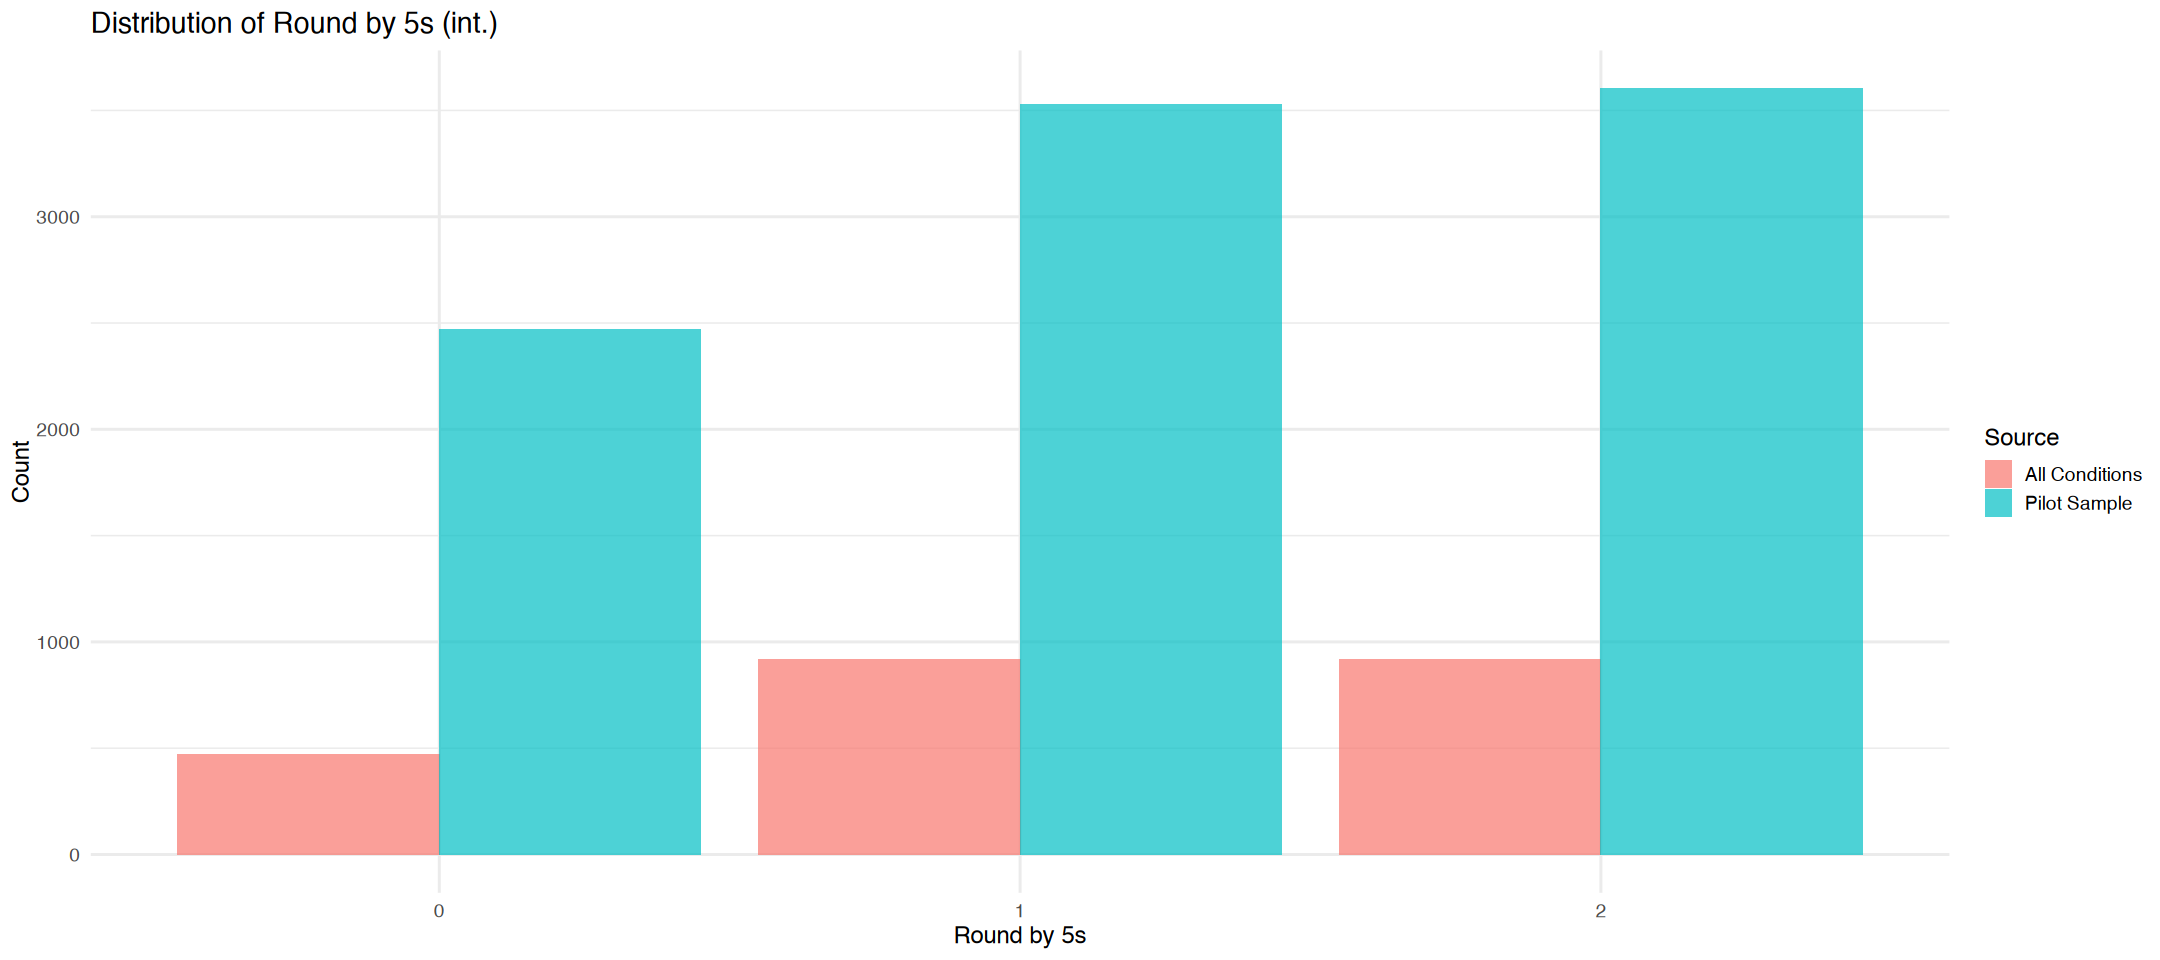

In [9]:
# Plot the value distribution by source
round5 <- ggplot(combinedDF, aes(x = factor(round5Distance), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Round by 5s (int.)",
    x = "Round by 5s",
    y = "Count",
    fill = "Source"
  )

round5

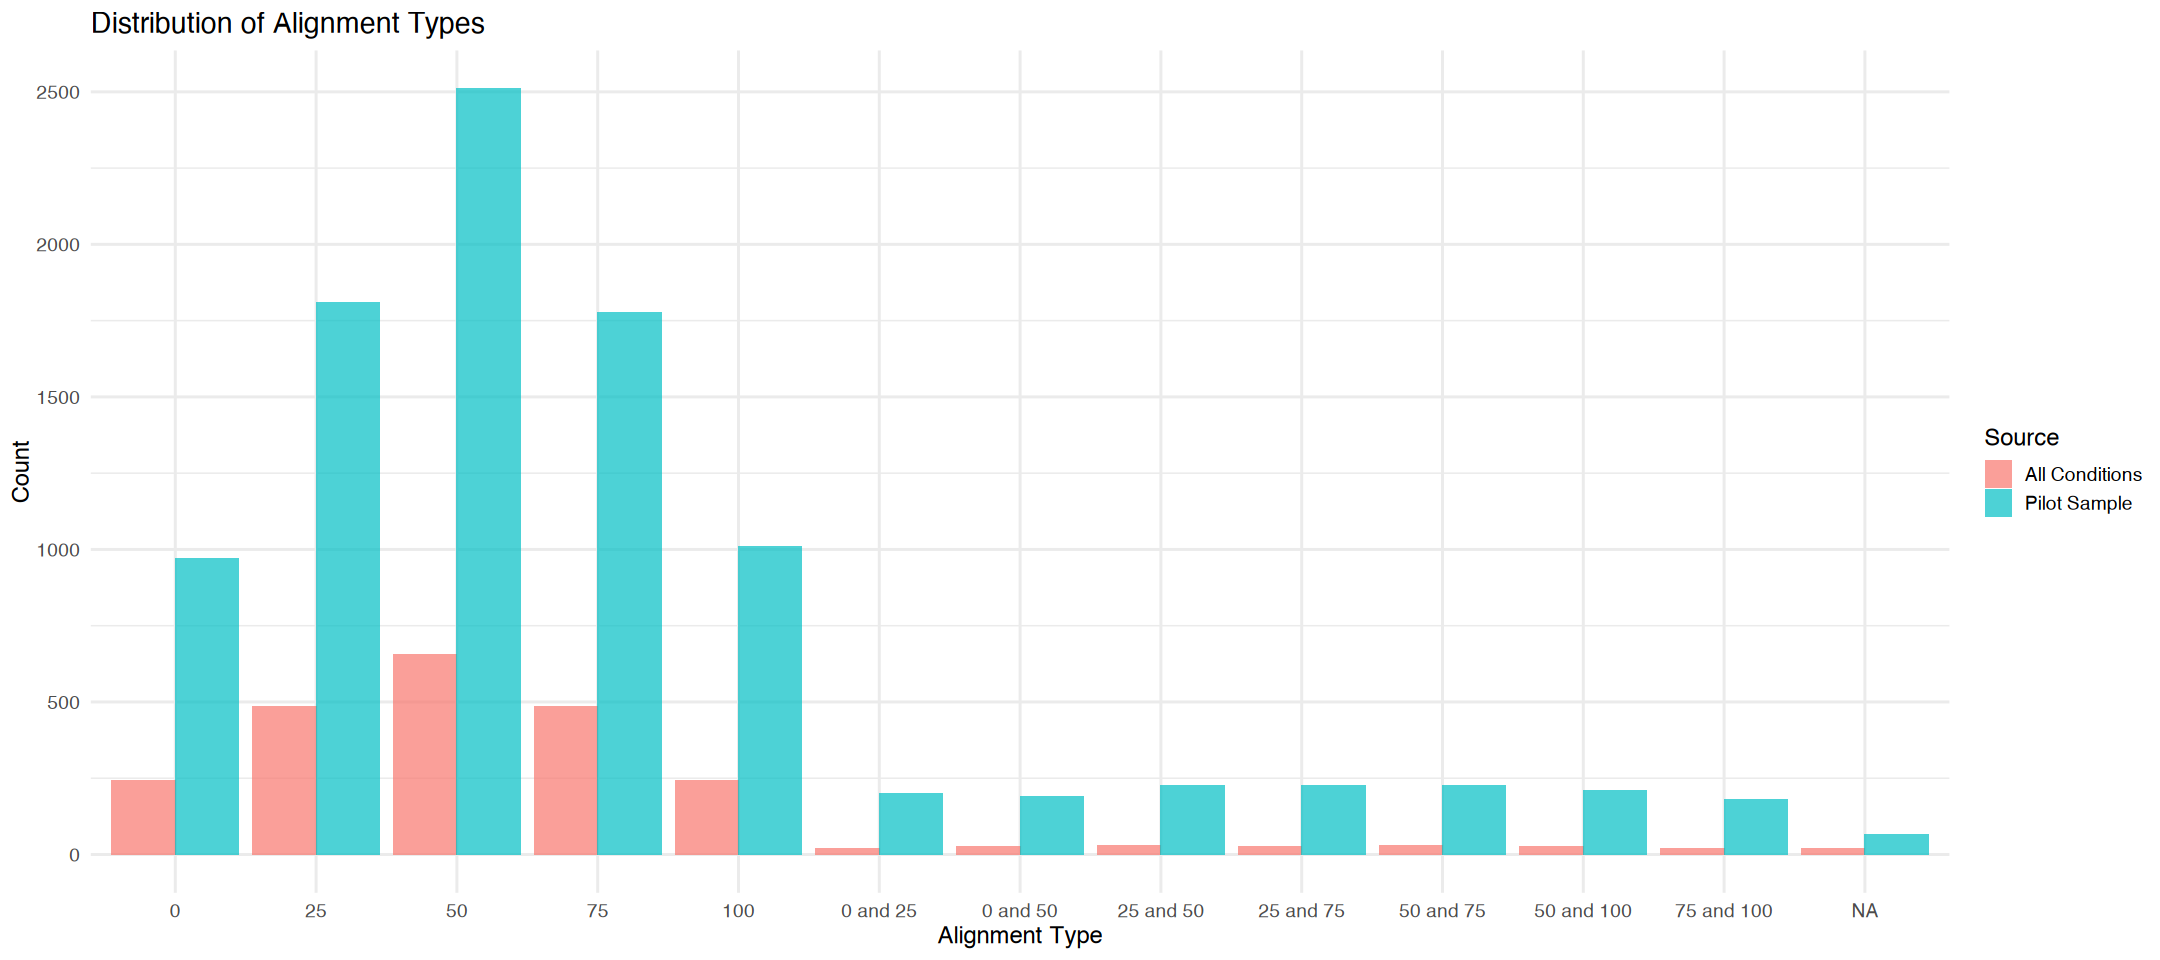

In [10]:
# Plot
p1 <- ggplot(combinedDF, aes(x = alignmentType, fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Alignment Types",
    x = "Alignment Type",
    y = "Count",
    fill = "Source"
  )

p1


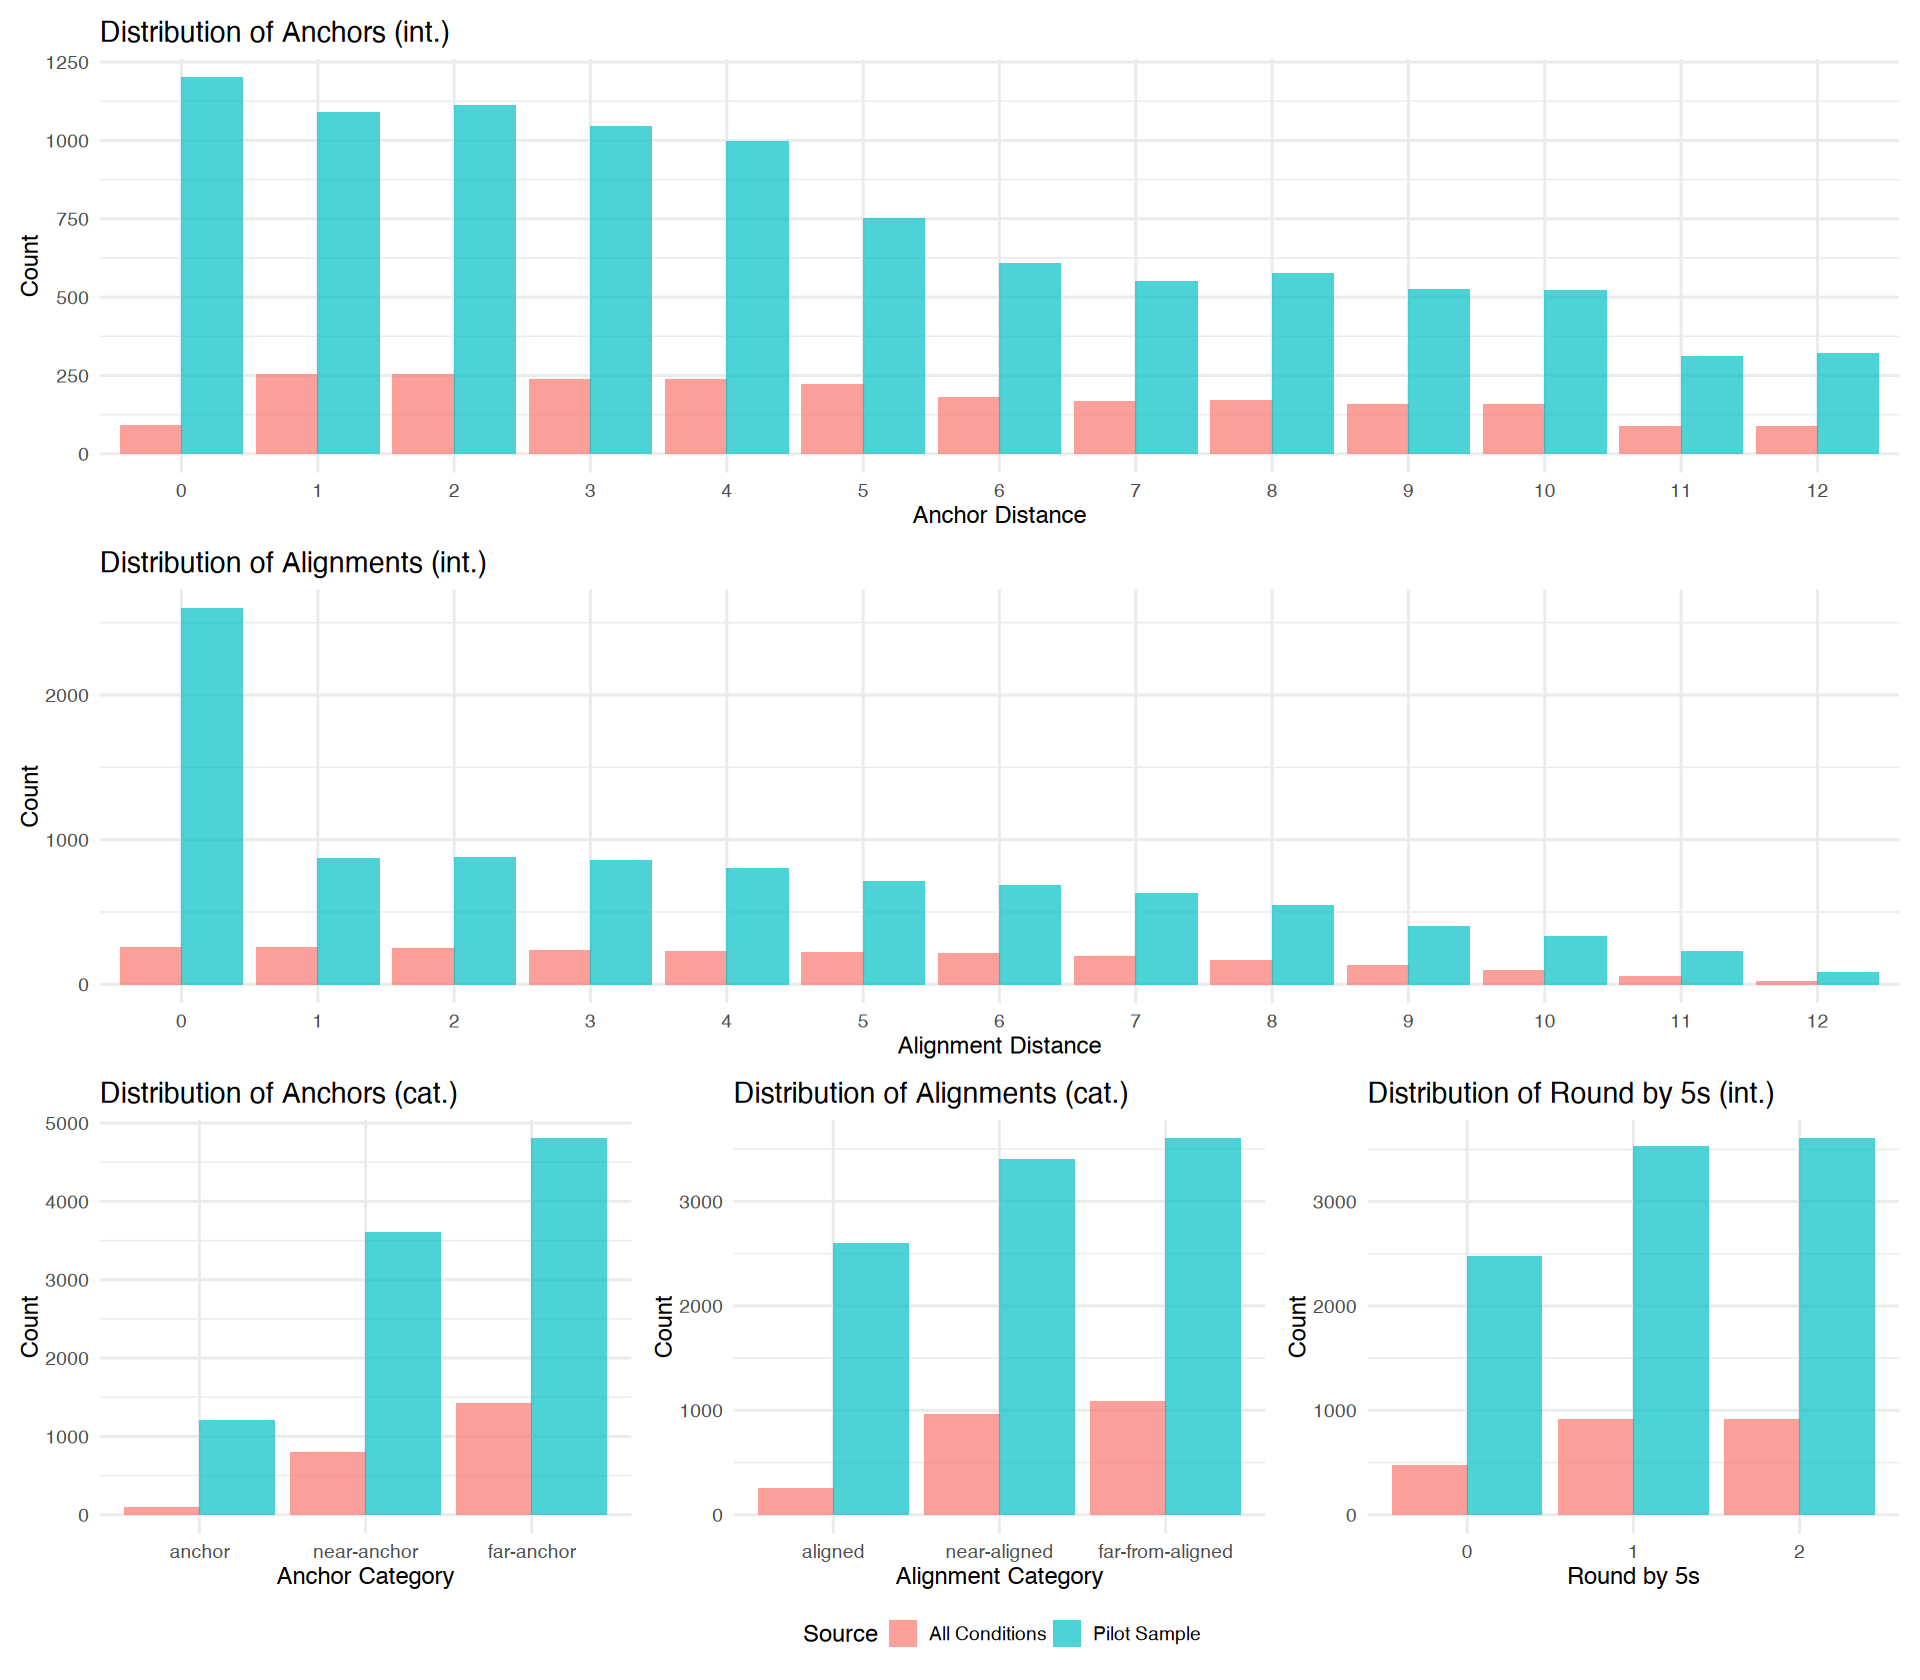

In [ ]:
# Plot the value distribution by source
alignmentDistance <- ggplot(combinedDF, aes(x = factor(alignmentDistance), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  labs(
    title = "Distribution of Alignments (int.)",
    x = "Alignment Distance",
    y = "Count",
    fill = "Source"
  ) + 
  theme_minimal(base_size = 14)

# Plot the value distribution by source
alignmentDistance <- ggplot(combinedDF, aes(x = factor(alignmentDistance), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  labs(
    title = "Distribution of Alignments (int.)",
    x = "Alignment Distance",
    y = "Count",
    fill = "Source"
  ) + 
  theme_minimal(base_size = 14)

# Plot the value distribution by source
anchorCategory <- ggplot(combinedDF, aes(x = factor(anchorCategory), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Anchors (cat.)",
    x = "Anchor Category",
    y = "Count",
    fill = "Source"
  )

# Plot the value distribution by source
round5 <- ggplot(combinedDF, aes(x = factor(round5Distance), fill = source)) +
  geom_bar(position = "dodge", alpha = 0.7) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribution of Round by 5s (int.)",
    x = "Round by 5s",
    y = "Count",
    fill = "Source"
  )

options(repr.plot.width = 16, repr.plot.height = 14)

finalLayout <- (
  anchorDistance / 
  alignmentDistance / 
  (anchorCategory | alignmentCategory | round5)
) + 
  plot_layout(guides = "collect") & 
  theme(legend.position = "bottom")

# Display the layout
finalLayout


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


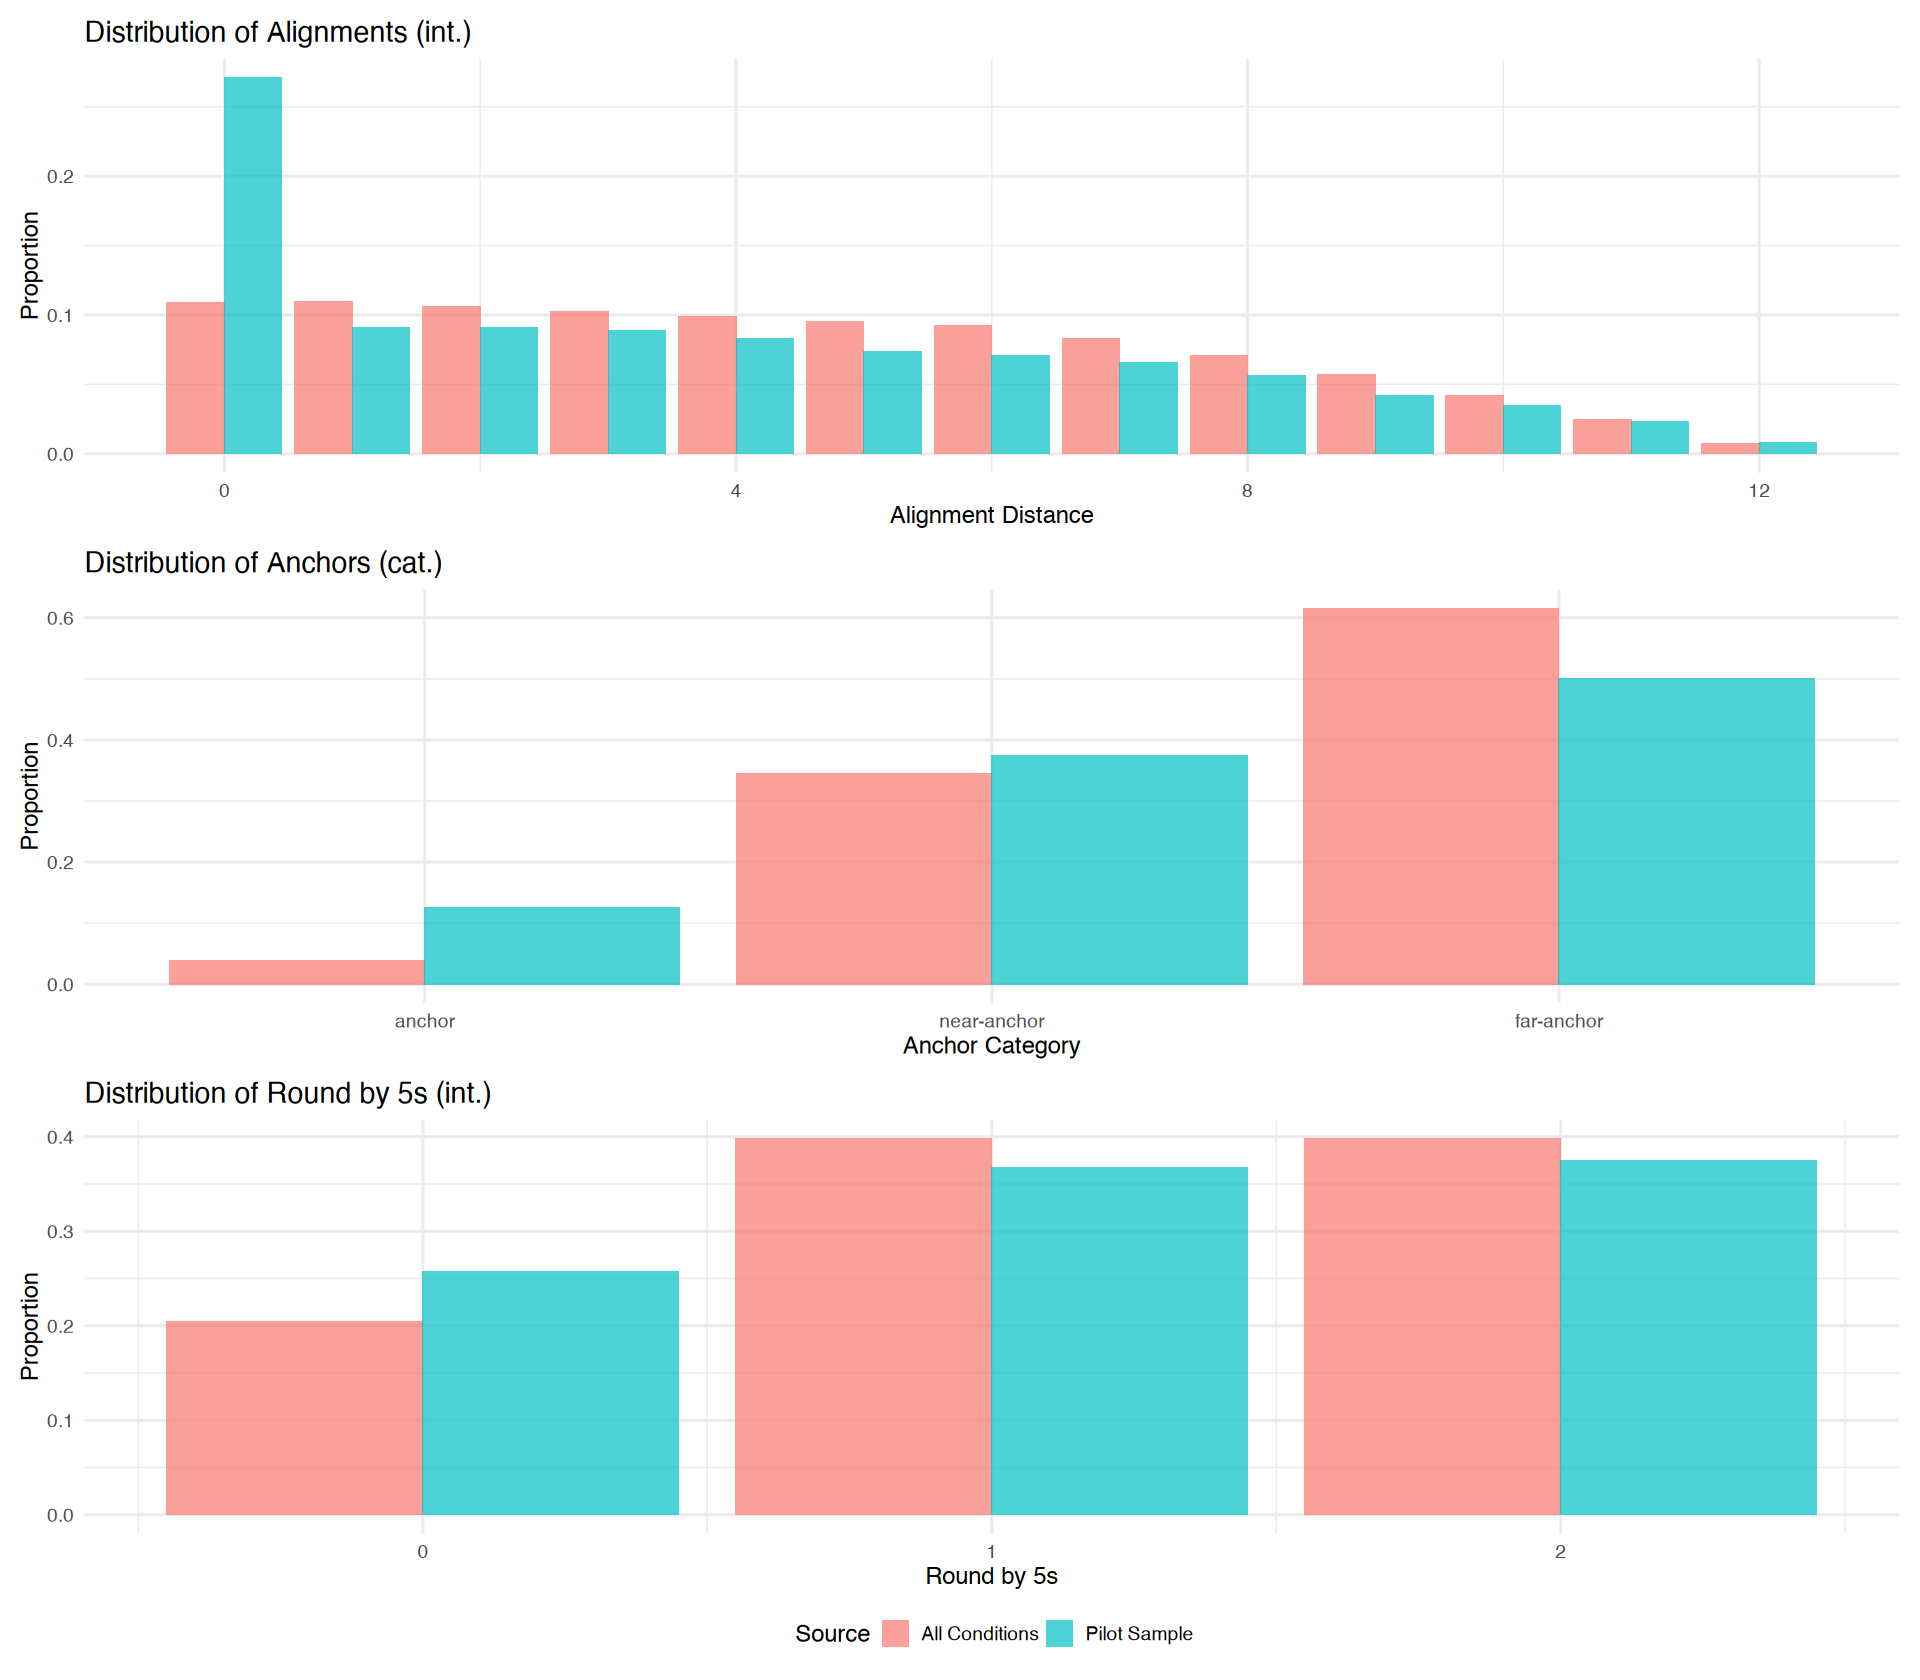

In [12]:
library(dplyr)

# Helper function to normalize and plot
make_normalized_bar <- function(df, xvar, title, xlabel) {
  df %>%
    group_by(source, !!sym(xvar)) %>%
    summarise(count = n(), .groups = "drop") %>%
    group_by(source) %>%
    mutate(prop = count / sum(count)) %>%
    ggplot(aes_string(x = xvar, y = "prop", fill = "source")) +
    geom_bar(stat = "identity", position = "dodge", alpha = 0.7) +
    labs(
      title = title,
      x = xlabel,
      y = "Proportion",
      fill = "Source"
    ) +
    theme_minimal(base_size = 14)
}

# Create plots
alignmentDistance <- make_normalized_bar(combinedDF, "alignmentDistance", "Distribution of Alignments (int.)", "Alignment Distance")
anchorCategory     <- make_normalized_bar(combinedDF, "anchorCategory",     "Distribution of Anchors (cat.)",     "Anchor Category")
round5             <- make_normalized_bar(combinedDF, "round5Distance",     "Distribution of Round by 5s (int.)", "Round by 5s")

# Layout
options(repr.plot.width = 16, repr.plot.height = 14)

finalLayout <- (
  alignmentDistance / 
  anchorCategory / 
  round5
) + 
  plot_layout(guides = "collect") & 
  theme(legend.position = "bottom")

finalLayout
